In [1]:
from gluonts.dataset.repository.datasets import get_dataset
import pandas as pd
import yaml
import io


from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt

In [401]:
import numpy as np

In [402]:
dataset_names = ['constant', 'exchange_rate', 'solar-energy', 'electricity',
                 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips',
                 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing',
                 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly',
                 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing',
                 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly',
                 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 
                 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']

In [439]:
not_yet_included = [9, 10, 11, 12, 13, 30, 31, 32, 33]

In [440]:
np.array(dataset_names)[[i for i in  range(len(dataset_names)) if i not in not_yet_included]]

array(['constant', 'exchange_rate', 'solar-energy', 'electricity',
       'traffic', 'exchange_rate_nips', 'electricity_nips',
       'traffic_nips', 'solar_nips', 'm1_yearly', 'm1_quarterly',
       'm1_monthly', 'nn5_daily_with_missing',
       'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly',
       'tourism_quarterly', 'tourism_yearly', 'm3_monthly',
       'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily',
       'm4_weekly'], dtype='<U34')

In [451]:
dataset_n = 7
dataset_names[dataset_n]

'traffic_nips'

In [452]:
ds = get_dataset(dataset_names[dataset_n])


<AxesSubplot:>

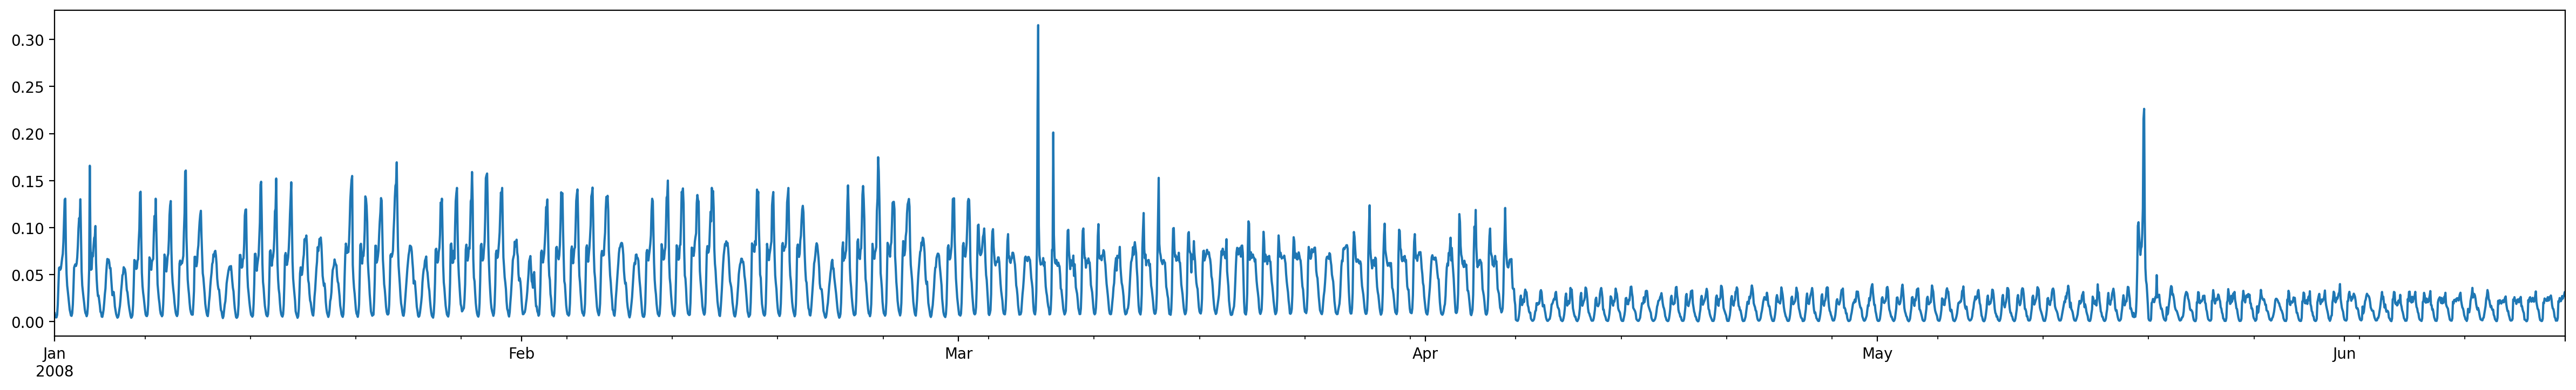

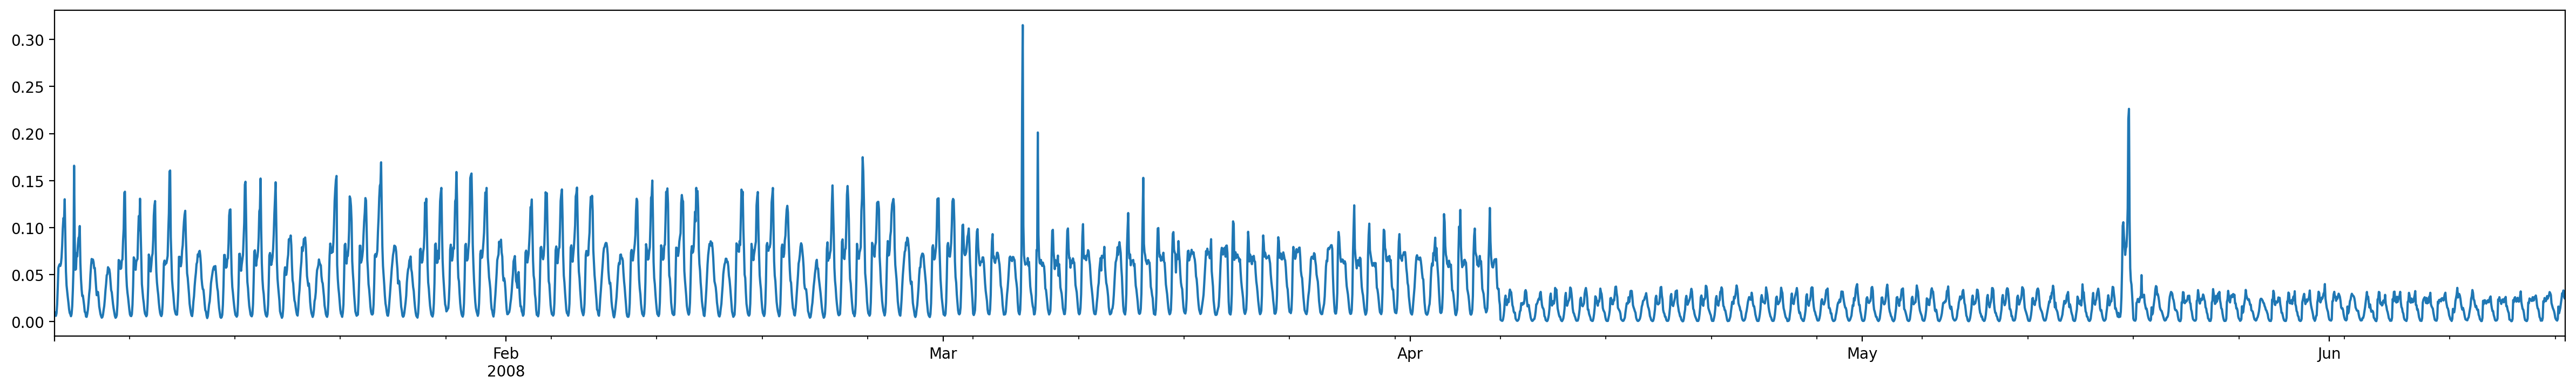

In [453]:
plt.figure(figsize = (30, 4), dpi = 200)
to_pandas(list(ds.train)[0]).plot()
plt.figure(figsize = (30, 4), dpi = 200)
to_pandas(list(ds.test)[0]).plot()

In [432]:
to_pandas(list(ds.train)[1]).reset_index().merge(to_pandas(list(ds.test)[1]).reset_index(), how = 'outer')

,index,0
0,1750-01-01,2793.699951
1,1750-01-02,2793.800049
2,1750-01-03,2803.699951
3,1750-01-04,2805.800049
4,1750-01-05,2802.300049
...,...,...
1015,1752-10-12,2989.000000
1016,1752-10-13,2991.399902
1017,1752-10-14,3024.899902
1018,1752-10-15,3070.800049


In [433]:
len(list(ds.train))

4227

In [435]:
to_pandas(list(ds.train)[1]).shape

(1006,)

In [366]:
for ts in range(len(list(ds.train))):
#     df = to_pandas(list(ds.train)[ts]).reset_index()
    df = to_pandas(list(ds.train)[1]).reset_index().merge(to_pandas(list(ds.test)[1]).reset_index(), how = 'outer')
    df.columns = ['ds', 'y']    
    df.to_pickle(f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle')

In [367]:
with open("../conf/base/parameters.yml", 'r') as stream:
    try:
        d = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [368]:
d[dataset_names[dataset_n]]

KeyError: 'm4_weekly'

In [369]:
{dataset_names[dataset_n]: {'freq': ds.metadata.freq, 'nan_interpolation': 'linear'}}

{'m4_weekly': {'freq': 'W', 'nan_interpolation': 'linear'}}

In [370]:
d.update({dataset_names[dataset_n]: {'freq': ds.metadata.freq, 'nan_interpolation': 'linear'}})

In [371]:
# Write YAML file
with io.open("../conf/base/parameters.yml", 'w', encoding='utf8') as outfile:
    yaml.dump(d, outfile, default_flow_style=False, allow_unicode=True)


In [372]:
f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle'

'../data/02_intermediate/m4_weekly_358.pickle'

In [373]:
pd.read_pickle(f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle')

,ds,y
0,1750-01-04,195.927994
1,1750-01-11,194.796005
2,1750-01-18,192.710007
3,1750-01-25,190.287994
4,1750-02-01,188.770004
...,...,...
1718,1782-12-08,3638.559082
1719,1782-12-15,3635.781006
1720,1782-12-22,3522.327881
1721,1782-12-29,3458.631104


In [54]:
a = {'input': 'exchange_rate'}

In [55]:
a['input']

'exchange_rate'

In [56]:
import re

In [66]:
pattern = re.compile(fr'^{a["input"]}_\d')

In [77]:
a = 'exchange_rate'

In [82]:
a.split('_')[-1].isnumeric()

False

In [71]:
list_ds = ['exchange_rate', 'exchange', 'exchange_rate_nips', 'exchange_rate_4', 'exchange_rate_45']

In [72]:
[i for i in list_ds if pattern.match(i)]

['exchange_rate_4', 'exchange_rate_45']